In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
boss = pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")

In [ ]:
boss.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
boss.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [ ]:
boss.shape

(5000, 7)

In [ ]:
boss.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = boss.iloc[:, 0:5]
y = boss['Price']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)

In [ ]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3430,72102.194650,5.146607,7.559894,3.50,18819.288593
3979,66484.844242,5.700885,6.908871,3.40,28002.647094
2153,78286.517912,4.236881,7.465136,5.29,42425.776352
4764,89687.484825,5.822977,7.475893,3.44,33767.333575
36,78667.904598,5.470652,7.780837,4.10,27637.656548
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [ ]:
y_train

3430    9.958132e+05
3979    8.735092e+05
2153    1.360502e+06
4764    1.742351e+06
36      1.233220e+06
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 3750, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
Nn = KNeighborsRegressor()
Nn.fit(X_train,y_train)
y_pred = Nn.predict(X_test)

In [ ]:
import sklearn
X_axis = [i for i in range(1,50)]
Y_axis = []
for i in range(1,50):
  model = KNeighborsRegressor(i)
  model.fit(X_train,y_train)
  pred_y = model.predict(X_test)
  mse = sklearn.metrics.mean_squared_error(y_test, pred_y,squared = False)
  Y_axis.append(mse)
  print(f"Error for k({i}) = {mse}")

Error for k(1) = 329949.6947800153
Error for k(2) = 289823.297861354
Error for k(3) = 273177.5560759873
Error for k(4) = 265047.724007709
Error for k(5) = 258460.41735197004
Error for k(6) = 254606.08881569633
Error for k(7) = 252586.83876577407
Error for k(8) = 250385.29019236614
Error for k(9) = 248910.19441699047
Error for k(10) = 247653.67705347514
Error for k(11) = 246307.7799763509
Error for k(12) = 244961.8493953462
Error for k(13) = 244231.71539412386
Error for k(14) = 243501.74379434114
Error for k(15) = 243107.7784052037
Error for k(16) = 242732.44579023178
Error for k(17) = 241918.94331569687
Error for k(18) = 241227.80031162995
Error for k(19) = 241090.37722017983
Error for k(20) = 241246.9845129284
Error for k(21) = 241419.51954026363
Error for k(22) = 241011.0200886494
Error for k(23) = 241236.12630270224
Error for k(24) = 240988.00638901888
Error for k(25) = 240882.23175579973
Error for k(26) = 240605.353156386
Error for k(27) = 240957.56405572538
Error for k(28) = 24086

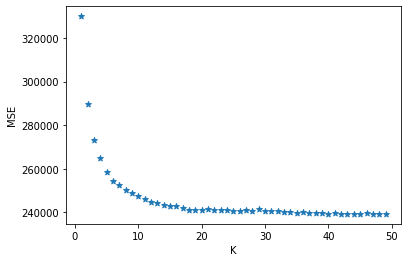

In [ ]:
plt.scatter(X_axis, Y_axis, marker = '*')
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

In [ ]:
r2_score(y_test,y_pred)

0.4654612865557478

In [ ]:
ct = 0
ln = 0
for i in y_pred:      # Mean Error
  ct += i
  ln += 1
ct/ln

1240317.2668683028

In [ ]:
mean_squared_error(y_test, y_pred, squared = False)   # RMSE

258460.41735197004

In [ ]:
mean_squared_error(y_test, y_pred, squared = True)    # MSE

66801787337.75454